**Objective**

For the Maven Rail Challenge, a company that provides business services to passenger train operators in England, Scotland, and Wales.

The manager requested to create an exploratory dashboard that helps them:

1. Identify the most popular routes
2. Determine peak travel times
3. Analyze revenue from different ticket types & classes
4. Diagnose on-time performance and contributing factors

### Import required tools and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
pd.options.display.max_columns = 20 #expand no of columns

In [90]:
df = pd.read_csv('railway.csv')
df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,None,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,None,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,None,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No


In [82]:
df_copy = df.copy()

In [8]:
df.shape

(31653, 18)

In [9]:
df['Transaction ID'].shape

(31653,)

In [10]:
df.dtypes

Transaction ID         object
Date of Purchase       object
Time of Purchase       object
Purchase Type          object
Payment Method         object
Railcard               object
Ticket Class           object
Ticket Type            object
Price                   int64
Departure Station      object
Arrival Destination    object
Date of Journey        object
Departure Time         object
Arrival Time           object
Actual Arrival Time    object
Journey Status         object
Reason for Delay       object
Refund Request         object
dtype: object

In [15]:
pd.to_datetime(df['Date of Purchase']).min(), pd.to_datetime(df['Date of Purchase']).max()

(Timestamp('2023-12-08 00:00:00'), Timestamp('2024-04-30 00:00:00'))

In [24]:
pd.to_datetime(df['Date_of_Purchase']).max() - pd.to_datetime(df['Date_of_Purchase']).min()

Timedelta('144 days 00:00:00')

Observation: Each row represent Ticket Transaction for Mock train for National Rail in the UK, and collected from Jan to April 2024

## Data Cleaning

#### Correcting datatypes and columns names

In [16]:
df.columns

Index(['Transaction ID', 'Date of Purchase', 'Time of Purchase',
       'Purchase Type', 'Payment Method', 'Railcard', 'Ticket Class',
       'Ticket Type', 'Price', 'Departure Station', 'Arrival Destination',
       'Date of Journey', 'Departure Time', 'Arrival Time',
       'Actual Arrival Time', 'Journey Status', 'Reason for Delay',
       'Refund Request'],
      dtype='object')

In [91]:
#lets replace space with underscore
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['Transaction_ID', 'Date_of_Purchase', 'Time_of_Purchase',
       'Purchase_Type', 'Payment_Method', 'Railcard', 'Ticket_Class',
       'Ticket_Type', 'Price', 'Departure_Station', 'Arrival_Destination',
       'Date_of_Journey', 'Departure_Time', 'Arrival_Time',
       'Actual_Arrival_Time', 'Journey_Status', 'Reason_for_Delay',
       'Refund_Request'],
      dtype='object')

In [97]:
#check for duplicate rows
df[df.duplicated(subset = 'Transaction_ID')]
#no duplicated data found

,Transaction_ID,Date_of_Purchase,Time_of_Purchase,Purchase_Type,Payment_Method,Railcard,Ticket_Class,Ticket_Type,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Journey_Status,Reason_for_Delay,Refund_Request


In [84]:
#datatypes
df.dtypes

Transaction_ID         object
Date_of_Purchase       object
Time_of_Purchase       object
Purchase_Type          object
Payment_Method         object
Railcard               object
Ticket_Class           object
Ticket_Type            object
Price                   int64
Departure_Station      object
Arrival_Destination    object
Date_of_Journey        object
Departure_Time         object
Arrival_Time           object
Actual_Arrival_Time    object
Journey_Status         object
Reason_for_Delay       object
Refund_Request         object
dtype: object

In [41]:
#(pd.to_datetime(df['Date_of_Journey']) - pd.to_datetime(df['Date_of_Purchase']))/np.timedelta64(1,"D")

In [92]:
#convert time columns to datetime datatype with pandas method
df['Time_of_Purchase'] = pd.to_datetime(df['Date_of_Purchase'] +' '+ df['Time_of_Purchase'])
df['Departure_Time'] = pd.to_datetime(df['Date_of_Journey'] +' '+ df['Departure_Time'])
df['Arrival_Time'] = pd.to_datetime(df['Date_of_Journey'] +' '+ df['Arrival_Time'])
df['Actual_Arrival_Time'] = pd.to_datetime(df['Date_of_Journey'] +' '+ df['Actual_Arrival_Time'])

In [93]:
#convert date columns to datetime datatype with pandas method
df['Date_of_Purchase'] = pd.to_datetime(df['Date_of_Purchase'])
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [94]:
df.dtypes

Transaction_ID                 object
Date_of_Purchase       datetime64[ns]
Time_of_Purchase       datetime64[ns]
Purchase_Type                  object
Payment_Method                 object
Railcard                       object
Ticket_Class                   object
Ticket_Type                    object
Price                           int64
Departure_Station              object
Arrival_Destination            object
Date_of_Journey        datetime64[ns]
Departure_Time         datetime64[ns]
Arrival_Time           datetime64[ns]
Actual_Arrival_Time    datetime64[ns]
Journey_Status                 object
Reason_for_Delay               object
Refund_Request                 object
dtype: object

In [95]:
df.head(1)

,Transaction_ID,Date_of_Purchase,Time_of_Purchase,Purchase_Type,Payment_Method,Railcard,Ticket_Class,Ticket_Type,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Journey_Status,Reason_for_Delay,Refund_Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,2023-12-08 12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,2024-01-01 11:00:00,2024-01-01 13:30:00,2024-01-01 13:30:00,On Time,NaN,No


In [102]:
#Lets change object and Categorical data to Categorical datatype
df['Purchase_Type'].unique()

array(['Online', 'Station'], dtype=object)

In [106]:
df_copy = df.copy()

In [107]:
df['Purchase_Type'] = pd.Categorical(df['Purchase_Type'])

In [109]:
df['Purchase_Type'].dtypes

CategoricalDtype(categories=['Online', 'Station'], ordered=False)

In [123]:
#lets change other columns
print(df['Payment_Method'].unique())
df['Payment_Method'] = pd.Categorical(df['Payment_Method'])
print(df['Payment_Method'].dtype)

['Contactless', 'Credit Card', 'Debit Card']
Categories (3, object): ['Contactless', 'Credit Card', 'Debit Card']
category


In [122]:
print(df['Railcard'].unique())
df['Railcard'] = pd.Categorical(df['Railcard'])
print(df['Railcard'].dtype)

['Adult', 'None', 'Disabled', 'Senior']
Categories (4, object): ['Adult', 'Disabled', 'None', 'Senior']
category


In [121]:
print(df['Ticket_Class'].unique())
df['Ticket_Class'] = pd.Categorical(df['Ticket_Class'])
print(df['Ticket_Class'].dtype)

['Standard', 'First Class']
Categories (2, object): ['First Class', 'Standard']
category


In [127]:
print(df['Ticket_Type'].unique())
df['Ticket_Type'] = pd.Categorical(df['Ticket_Type'])
print(df['Ticket_Type'].dtype)

['Advance' 'Off-Peak' 'Anytime']
category


In [129]:
print(df['Journey_Status'].unique())
df['Journey_Status'] = pd.Categorical(df['Journey_Status'])
print(df['Journey_Status'].dtype)

['On Time' 'Delayed' 'Cancelled']
category


In [132]:
df['Reason_for_Delay'].value_counts(dropna = False)

NaN                   27481
Weather                 995
Technical Issue         707
Signal Failure          523
Signal failure          447
Staffing                410
Staff Shortage          399
Weather Conditions      377
Traffic                 314
Name: Reason_for_Delay, dtype: int64

In [134]:
df['Reason_for_Delay'] = pd.Categorical(df['Reason_for_Delay'])
print(df['Journey_Status'].dtype)

category


In [137]:
df['Refund_Request'].value_counts()

No     30535
Yes     1118
Name: Refund_Request, dtype: int64

In [138]:
df['Refund_Request'] = pd.Categorical(df['Refund_Request'])
print(df['Refund_Request'].dtype)

category


In [139]:
df.dtypes

Transaction_ID                 object
Date_of_Purchase       datetime64[ns]
Time_of_Purchase       datetime64[ns]
Purchase_Type                category
Payment_Method               category
Railcard                     category
Ticket_Class                 category
Ticket_Type                  category
Price                           int64
Departure_Station              object
Arrival_Destination            object
Date_of_Journey        datetime64[ns]
Departure_Time         datetime64[ns]
Arrival_Time           datetime64[ns]
Actual_Arrival_Time    datetime64[ns]
Journey_Status               category
Reason_for_Delay             category
Refund_Request               category
dtype: object

In [224]:
#lets save the data in a pickle file to not to lose the datatypes as csv wont recognize datetime and category
import pickle

with open('clean_data.pkl','wb') as f:
    pickle.dump(df,f )

In [3]:
import pickle
with open('clean_data.pkl','rb') as f:
    df = pickle.load(f )

In [4]:
#checking missing values

df.isnull().sum()

Transaction_ID             0
Date_of_Purchase           0
Time_of_Purchase           0
Purchase_Type              0
Payment_Method             0
Railcard                   0
Ticket_Class               0
Ticket_Type                0
Price                      0
Departure_Station          0
Arrival_Destination        0
Date_of_Journey            0
Departure_Time             0
Arrival_Time               0
Actual_Arrival_Time     1880
Journey_Status             0
Reason_for_Delay       27481
Refund_Request             0
dtype: int64

Observation: There are some null values in the Actual Arrial Time, lets explore further and know what could be the reason

In [9]:
df['Journey_Status'].unique()

['On Time', 'Delayed', 'Cancelled']
Categories (3, object): ['Cancelled', 'Delayed', 'On Time']

In [12]:
df[df['Actual_Arrival_Time'].isnull()][['Arrival_Time','Actual_Arrival_Time','Journey_Status']]

,Arrival_Time,Actual_Arrival_Time,Journey_Status
39,2024-01-02 03:35:00,NaT,Cancelled
75,2024-01-02 17:20:00,NaT,Cancelled
91,2024-01-02 03:35:00,NaT,Cancelled
111,2024-01-02 06:20:00,NaT,Cancelled
148,2024-01-02 10:15:00,NaT,Cancelled
...,...,...,...
31639,2024-04-30 20:35:00,NaT,Cancelled
31641,2024-04-30 20:35:00,NaT,Cancelled
31642,2024-04-30 19:15:00,NaT,Cancelled
31644,2024-04-30 20:05:00,NaT,Cancelled


In [14]:
df[df['Actual_Arrival_Time'].isnull()]['Journey_Status'].unique()

['Cancelled']
Categories (3, object): ['Cancelled', 'Delayed', 'On Time']

Observation: From Journey Status column we understood that those trains were cancelled, hence they didn't actually arrived 

In [17]:
df['Reason_for_Delay'].unique()

[NaN, 'Signal Failure', 'Technical Issue', 'Weather Conditions', 'Weather', 'Staffing', 'Staff Shortage', 'Signal failure', 'Traffic']
Categories (8, object): ['Signal Failure', 'Signal failure', 'Staff Shortage', 'Staffing', 'Technical Issue', 'Traffic', 'Weather', 'Weather Conditions']

In [15]:
#lets explore the null values in Reason_for_Delay column
df[df['Reason_for_Delay'].isnull()]['Journey_Status'].unique()

['On Time']
Categories (3, object): ['Cancelled', 'Delayed', 'On Time']

Observation: From the Journey Status columns, we understood that those Trains were not delayed they are On-Time. So, Lets replace null value with "No Delay"

In [20]:
#since Reason for Delay is a categorical column, we need to add new category first

# Add 'No Delay' to the categories
df['Reason_for_Delay'] = df['Reason_for_Delay'].cat.add_categories('No Delay')
df['Reason_for_Delay']

0                   NaN
1        Signal Failure
2                   NaN
3                   NaN
4                   NaN
              ...      
31648               NaN
31649               NaN
31650               NaN
31651               NaN
31652               NaN
Name: Reason_for_Delay, Length: 31653, dtype: category
Categories (9, object): ['Signal Failure', 'Signal failure', 'Staff Shortage', 'Staffing', ..., 'Traffic', 'Weather', 'Weather Conditions', 'No Delay']

In [22]:
df['Reason_for_Delay'].fillna('No Delay', inplace = True)

In [27]:
#spelling errors and other text data analysis 
df['Departure_Station'].unique()
#Text looks fine

array(['London Paddington', 'London Kings Cross', 'Liverpool Lime Street',
       'London Euston', 'York', 'Manchester Piccadilly',
       'Birmingham New Street', 'London St Pancras', 'Oxford', 'Reading',
       'Edinburgh Waverley', 'Bristol Temple Meads'], dtype=object)

In [31]:
np.sort(df['Arrival_Destination'].unique())
#Text looks fine

array(['Birmingham New Street', 'Bristol Temple Meads', 'Cardiff Central',
       'Coventry', 'Crewe', 'Didcot', 'Doncaster', 'Durham', 'Edinburgh',
       'Edinburgh Waverley', 'Leeds', 'Leicester',
       'Liverpool Lime Street', 'London Euston', 'London Kings Cross',
       'London Paddington', 'London St Pancras', 'London Waterloo',
       'Manchester Piccadilly', 'Nottingham', 'Nuneaton', 'Oxford',
       'Peterborough', 'Reading', 'Sheffield', 'Stafford', 'Swindon',
       'Tamworth', 'Wakefield', 'Warrington', 'Wolverhampton', 'York'],
      dtype=object)

## Exploratory Data Analysis (EDA)

Useful columns to answer the questions:

Transaction_ID, Arrival_Destination, Departure_Station

('Departure_Time'), 'Arrival_Time', 'Actual_Arrival_Time'

Price, Ticket_Type, Ticket_Class

Journey status: 'Arrival_Time','Actual_Arrival_Time' - contributing factors: Reason_for_Delay, routes? : Arrival_Destination, Departure_Station, months(weather?),

<AxesSubplot:xlabel='Price', ylabel='Count'>

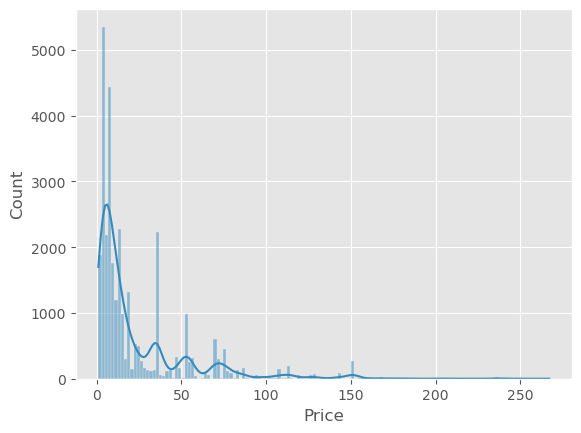

In [43]:
#lets explore each of the above columns 
#Numerical column
sns.histplot(df['Price'], kde =True)

Observation:
1. The data is skewed to the right with the majority of values concentrated on the left side of the graph.
2. the shape of the histogram does resemble an exponential distribution

<AxesSubplot:xlabel='Price'>

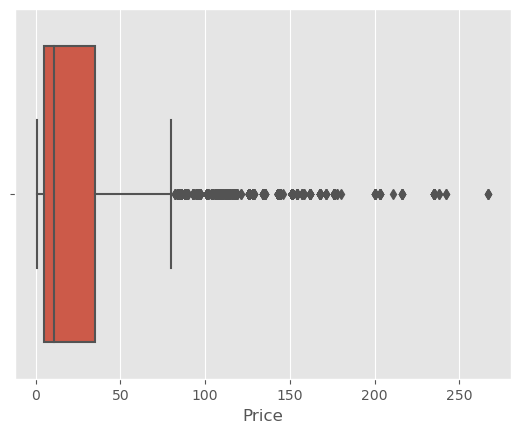

In [36]:
sns.boxplot(df['Price'])
#there seems to be some outliers but there could be higher prices for some class or type of ticket etc.

In [37]:
#statistics
df['Price'].describe()

count    31653.000000
mean        23.439200
std         29.997628
min          1.000000
25%          5.000000
50%         11.000000
75%         35.000000
max        267.000000
Name: Price, dtype: float64

In [42]:
df['Price'].quantile(.90)
#

67.0

The 90th quantile (or 90th percentile) of a distribution is the value below which `90% of the data points` fall. 
90% of Prices are below `67`

### Lets start answering the questions

Useful columns to answer the questions: Transaction_ID, Arrival_Destination, Departure_Station

Date_of_Journey, 'Departure_Time', 'Arrival_Time', 'Actual_Arrival_Time'

Price, Ticket_Type, Ticket_Class

Journey status: 'Arrival_Time','Actual_Arrival_Time' - contributing factors: Reason_for_Delay, routes? : Arrival_Destination, Departure_Station, months(weather?),

1. **Identify the most popular routes**: A route in a train journey refers to the specific path or course that a train follows from its starting station to its destination. 

As each data point is a transaction of a passenger, we would consider the frequency/count of routes as the measure

In [44]:
df.columns

Index(['Transaction_ID', 'Date_of_Purchase', 'Time_of_Purchase',
       'Purchase_Type', 'Payment_Method', 'Railcard', 'Ticket_Class',
       'Ticket_Type', 'Price', 'Departure_Station', 'Arrival_Destination',
       'Date_of_Journey', 'Departure_Time', 'Arrival_Time',
       'Actual_Arrival_Time', 'Journey_Status', 'Reason_for_Delay',
       'Refund_Request'],
      dtype='object')

Departure Stations: Analyze which stations have the highest number of departures. Stations with high departure rates indicate that they are starting points for many journeys.

Arrival Destinations: Similarly, analyze which stations have the highest number of arrivals. Stations with high arrival rates indicate that they are popular destinations.

Route Mapping: By combining departure and arrival data, you can map out the routes that connect these popular departure stations with popular arrival destinations. This mapping helps visualize the most frequently traveled routes.

In [91]:
#lets create a dictionary object to save each results to a pickle files later we can use this pickle file
outputs = {}

In [46]:
#top 5 Arrival stations
df['Arrival_Destination'].value_counts()[:5]

Birmingham New Street    7742
Liverpool Lime Street    5022
York                     4019
Manchester Piccadilly    3968
Reading                  3920
Name: Arrival_Destination, dtype: int64

In [92]:
outputs['Top 5 Arrival Stations'] = df['Arrival_Destination'].value_counts()[:5]

In [49]:
#top 5 Departure stations
df['Departure_Station'].value_counts()[:5]

Manchester Piccadilly    5650
London Euston            4954
Liverpool Lime Street    4561
London Paddington        4500
London Kings Cross       4229
Name: Departure_Station, dtype: int64

In [93]:
outputs['Top 5 Departure Stations'] = df['Departure_Station'].value_counts()[:5]

In [9]:
#lets create a new columns as Route Mapping and check most popular routes:
df['Route_Mapping'] = df['Arrival_Destination']+' - '+df['Departure_Station']
Routes = df['Route_Mapping'].value_counts().reset_index().rename(columns = {'index':'Route'})
Routes['Percentage_Of_Bookings'] = round((Routes['Route_Mapping']/df.shape[0])*100,2)
Routes

,Route,Route_Mapping,Percentage_Of_Bookings
0,Liverpool Lime Street - Manchester Piccadilly,4628,14.62
1,Birmingham New Street - London Euston,4209,13.30
2,York - London Kings Cross,3922,12.39
3,Reading - London Paddington,3873,12.24
4,Birmingham New Street - London St Pancras,3471,10.97
...,...,...,...
60,York - Manchester Piccadilly,15,0.05
61,Wakefield - York,15,0.05
62,Edinburgh Waverley - York,15,0.05
63,Warrington - Manchester Piccadilly,15,0.05


In [10]:
outputs['Routes'] = Routes

In [19]:
outputs['Routes'][['Route','Percentage_Of_Bookings']].head(10)

,Route,Percentage_Of_Bookings
0,Liverpool Lime Street - Manchester Piccadilly,14.62
1,Birmingham New Street - London Euston,13.30
2,York - London Kings Cross,12.39
3,Reading - London Paddington,12.24
4,Birmingham New Street - London St Pancras,10.97
5,Manchester Piccadilly - Liverpool Lime Street,9.48
6,London Euston - Liverpool Lime Street,3.47
7,Manchester Piccadilly - London Euston,2.25
8,London St Pancras - Birmingham New Street,2.22
9,Oxford - London Paddington,1.53


In [225]:
with open('outputs.pkl','wb') as f:
    pickle.dump(outputs,f )

In [2]:
import pickle
with open('outputs.pkl','rb') as f:
    outputs = pickle.load(f )

**2. Determine peak travel times**: 'Departure_Time', Date_of_Journey

In [81]:
#since we combined Date of journey with Departure time, we can analyse with Departure_Time alone
df[['Departure_Time','Date_of_Journey']]

,Departure_Time,Date_of_Journey
0,2024-01-01 11:00:00,2024-01-01
1,2024-01-01 09:45:00,2024-01-01
2,2024-01-02 18:15:00,2024-01-02
3,2024-01-01 21:30:00,2024-01-01
4,2024-01-01 16:45:00,2024-01-01
...,...,...
31648,2024-04-30 20:00:00,2024-04-30
31649,2024-04-30 20:15:00,2024-04-30
31650,2024-04-30 20:15:00,2024-04-30
31651,2024-04-30 21:15:00,2024-04-30


In [98]:
#since we combined Date of journey with Departure time, we can analyse with Departure_Time alone
#First lets explore Popular Months, Days and later hours
#data collected from Jan to April 2024
outputs['Peak Travel Months'] = df['Departure_Time'].dt.month_name().value_counts()
outputs['Peak Travel Months']
#March and January on top

March       8117
January     8111
April       7781
February    7644
Name: Departure_Time, dtype: int64

In [17]:
outputs['Peak Travel Weeks'] = df['Departure_Time'].dt.day_name().value_counts()
outputs['Peak Travel Weeks']

Wednesday    4692
Tuesday      4607
Thursday     4580
Sunday       4580
Monday       4436
Saturday     4407
Friday       4351
Name: Departure_Time, dtype: int64

In [11]:
outputs['Peak Travel Hours'] = df['Departure_Time'].dt.hour.value_counts()
outputs['Peak Travel Hours']

18    3113
6     3112
17    2888
7     2795
16    2301
8     2179
13    1276
9     1230
15    1220
11    1143
20    1058
4     1041
2      942
14     855
0      853
22     788
12     773
5      725
1      644
23     641
21     570
3      543
10     525
19     438
Name: Departure_Time, dtype: int64

In [39]:
outputs['Peak Travel Hours'].sort_index()

0      853
1      644
2      942
3      543
4     1041
5      725
6     3112
7     2795
8     2179
9     1230
10     525
11    1143
12     773
13    1276
14     855
15    1220
16    2301
17    2888
18    3113
19     438
20    1058
21     570
22     788
23     641
Name: Departure_Time, dtype: int64

we can categorize the day into the following segments:

`Early Morning
Morning
Afternoon
Evening/Night`

The possible breakdown of these segments with specific hour ranges:

`Early Morning: 12:00 AM (midnight) - 5:59 AM
Morning: 6:00 AM - 11:59 AM
Afternoon: 12:00 PM (noon) - 5:59 PM
Evening/Night: 6:00 PM - 11:59 PM`

In [30]:
#Travel_Time_Segments = []

def determine_peak_time(departure_time):
    hour = departure_time.hour
    if 0 <= hour < 6:
        return 'Early Morning'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening/Night'

In [33]:
df['Travel_Time_Segment'] = df['Departure_Time'].apply(determine_peak_time)
df['Travel_Time_Segment']

0              Morning
1              Morning
2        Evening/Night
3        Evening/Night
4            Afternoon
             ...      
31648    Evening/Night
31649    Evening/Night
31650    Evening/Night
31651    Evening/Night
31652    Evening/Night
Name: Travel_Time_Segment, Length: 31653, dtype: object

In [36]:
outputs['peak travel times'] = df['Travel_Time_Segment'].value_counts()
outputs['peak travel times']

Morning          10984
Afternoon         9313
Evening/Night     6608
Early Morning     4748
Name: Travel_Time_Segment, dtype: int64

In [13]:
outputs['peak travel times'].values.sum()

31653

In [16]:
round(outputs['peak travel times']/outputs['peak travel times'].values.sum()*100,2)

Morning          34.70
Afternoon        29.42
Evening/Night    20.88
Early Morning    15.00
Name: Travel_Time_Segment, dtype: float64

**3. Analyze revenue from different ticket types & classes**
Price, Ticket_Type, Ticket_Class, (Railcard)

from data dictionary:

Ticket Class: Seat class for the ticket (Standard or First)

Ticket Type:	When you bought or can use the ticket. Advance tickets are 1/2 off and must be purchased at least a day prior to departure. Off-Peak tickets are 1/4 off and must be used outside of peak hours (weekdays between 6-8am and 4-6pm). Anytime tickets are full price and can be bought and used at any time during the day.

In [87]:
outputs['revenue_by_class'] = df.groupby('Ticket_Class')['Price'].agg(['sum','count']).reset_index().sort_values(by = 'sum',ascending = False)
outputs['revenue_by_class']

,Ticket_Class,sum,count
1,Standard,592522,28595
0,First Class,149399,3058


Observation: Revenue for Standard class is high compared to First Class, and as well as the number of passenger who bought the ticket

In [113]:
#relation with railcard
df.groupby(['Ticket_Class','Railcard'])['Price'].agg(['count']).reset_index()

,Ticket_Class,Railcard,count
0,First Class,Adult,490
1,First Class,Disabled,314
2,First Class,None,1985
3,First Class,Senior,269
4,Standard,Adult,4356
5,Standard,Disabled,2775
6,Standard,None,18933
7,Standard,Senior,2531


In [121]:
(490+314+269)/1985

0.5405541561712847

In [122]:
(4356+2775+2531)/18933

0.5103258860191201

Observation: around 50% of the passengers in both Ticket Classes are Railcard holders. So it wont be a factor for low prices in First Class transactions

In [88]:
outputs['revenue_by_type'] = df.groupby('Ticket_Type')['Price'].agg(['sum','count']).reset_index().sort_values(by = 'sum',ascending = False)
outputs['revenue_by_type']

,Ticket_Type,sum,count
0,Advance,309274,17561
2,Off-Peak,223338,8752
1,Anytime,209309,5340


Observation: The revenue for Advance & Off Peak booking is high compared to Anytime - This is interesting because Both have discounts/offer for the price but not for Anytime category. The reason for high revenue could be the no of passenger count in each Ticket Type...

We can try to find the relation with Railcard - as Railcard holders get 1/3 off their ticket purchases.
If there are more no of Railcard holders in `Anytime` this could be one of the factors for low revenue from anytime category

In [126]:
#relation with railcard
df.groupby(['Ticket_Type','Railcard'])['Price'].agg(['count']).reset_index()

,Ticket_Type,Railcard,count
0,Advance,Adult,2711
1,Advance,Disabled,1661
2,Advance,None,11625
3,Advance,Senior,1564
4,Anytime,Adult,811
5,Anytime,Disabled,549
6,Anytime,None,3371
7,Anytime,Senior,609
8,Off-Peak,Adult,1324
9,Off-Peak,Disabled,879


In [124]:
(2711+1661+1564)/11625 #Advance

0.5106236559139785

In [127]:
(811+811+609)/3371 #Anytime

0.6618214179768614

In [128]:
(1324+1324+627)/5922 #Off-Peak

0.5530226274907126

Observation: There are 66% of the passangers are having Railcard from Anytime category so this could be one of the factors for low revenue from Anytime category

In [90]:
outputs['revenue_by_class_and_type'] = df.groupby(['Ticket_Class', 'Ticket_Type'])['Price'].agg(['sum','count']).reset_index().sort_values(by = 'sum',ascending = False)
outputs['revenue_by_class_and_type']

,Ticket_Class,Ticket_Type,sum,count
3,Standard,Advance,242388,15797
5,Standard,Off-Peak,178666,7948
4,Standard,Anytime,171468,4850
0,First Class,Advance,66886,1764
2,First Class,Off-Peak,44672,804
1,First Class,Anytime,37841,490


In [101]:
outputs['revenue_by_class_and_type_crosstab'] = pd.crosstab(index = df['Ticket_Class'], columns =df['Ticket_Type'], values = df['Price'], aggfunc = 'sum' )
outputs['revenue_by_class_and_type_crosstab']

Ticket_Type,Advance,Anytime,Off-Peak
Ticket_Class,,,
First Class,66886,37841,44672
Standard,242388,171468,178666


<AxesSubplot:xlabel='Ticket_Type', ylabel='Ticket_Class'>

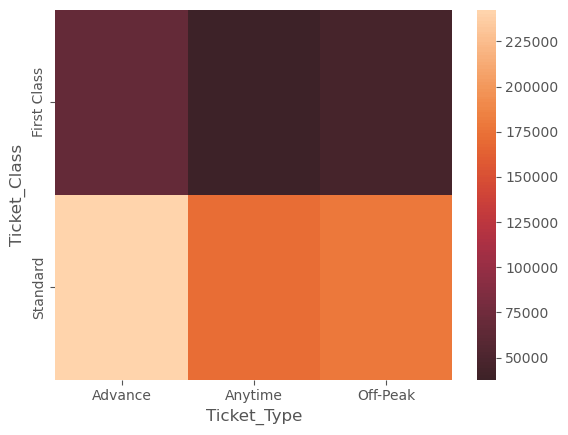

In [100]:
sns.heatmap(pd.crosstab(index = df['Ticket_Class'], columns =df['Ticket_Type'], values = df['Price'], aggfunc = 'sum' ), center = 0)

**4. Diagnose on-time performance and contributing factors**
note: There might be two or passengers travelling on a same train, as we don't have the information on the train id we will calculate On-Time Performance from all the transactions data

In [102]:
df.columns

Index(['Transaction_ID', 'Date_of_Purchase', 'Time_of_Purchase',
       'Purchase_Type', 'Payment_Method', 'Railcard', 'Ticket_Class',
       'Ticket_Type', 'Price', 'Departure_Station', 'Arrival_Destination',
       'Date_of_Journey', 'Departure_Time', 'Arrival_Time',
       'Actual_Arrival_Time', 'Journey_Status', 'Reason_for_Delay',
       'Refund_Request', 'Route_Mapping', 'Travel_Time_Segment'],
      dtype='object')

Journey status: 'Arrival_Time','Actual_Arrival_Time' - contributing factors: Reason_for_Delay, routes? : Arrival_Destination, Departure_Station, months(weather?),

In [132]:
outputs['On-Time Performance'] = df['Journey_Status'].value_counts()/df.shape[0]*100
outputs['On-Time Performance']

On Time      86.819575
Delayed       7.241020
Cancelled     5.939405
Name: Journey_Status, dtype: float64

*Trains are on time most of the times but there is a delay of 7%(this could be a same train or different as each row represent single transactions - Additional data is needed)

In [139]:
#Diagnosing contributing factors

outputs['Reason_for_Delay'] = df['Reason_for_Delay'].value_counts()
outputs['Reason_for_Delay']

No Delay              27481
Weather                 995
Technical Issue         707
Signal Failure          523
Signal failure          447
Staffing                410
Staff Shortage          399
Weather Conditions      377
Traffic                 314
Name: Reason_for_Delay, dtype: int64

In [25]:
round(outputs['Reason_for_Delay'][1:]/outputs['Reason_for_Delay'][1:].values.sum()*100,2)

Weather               23.85
Technical Issue       16.95
Signal Failure        12.54
Signal failure        10.71
Staffing               9.83
Staff Shortage         9.56
Weather Conditions     9.04
Traffic                7.53
Name: Reason_for_Delay, dtype: float64

Weather is the primary factor for the delays

In [189]:
outputs['routemap-delay'] = df.groupby(['Reason_for_Delay','Route_Mapping'])\
                            ['Transaction_ID'].count().reset_index().sort_values(by = 'Transaction_ID',ascending = False)\
                            .rename(columns = {'Transaction_ID':'Count'})
outputs['routemap-delay']

,Reason_for_Delay,Route_Mapping,Count
543,No Delay,Liverpool Lime Street - Manchester Piccadilly,3984
521,No Delay,Birmingham New Street - London Euston,3756
583,No Delay,York - London Kings Cross,3593
571,No Delay,Reading - London Paddington,3521
522,No Delay,Birmingham New Street - London St Pancras,3198
...,...,...,...
229,Staffing,London Paddington - Manchester Piccadilly,0
228,Staffing,London Paddington - Liverpool Lime Street,0
227,Staffing,London Paddington - Birmingham New Street,0
226,Staffing,London Kings Cross - Manchester Piccadilly,0


In [200]:
outputs['routemap-delay'] = outputs['routemap-delay'].query("Count>0").query('Reason_for_Delay!="No Delay"').copy()
outputs['routemap-delay']

,Reason_for_Delay,Route_Mapping,Count
417,Weather,London Euston - Liverpool Lime Street,527
153,Staff Shortage,Liverpool Lime Street - Manchester Piccadilly,145
287,Technical Issue,London Euston - Liverpool Lime Street,141
66,Signal failure,Birmingham New Street - London Euston,139
391,Weather,Birmingham New Street - London Euston,117
...,...,...,...
504,Weather Conditions,Peterborough - York,1
215,Staffing,Liverpool Lime Street - Birmingham New Street,1
230,Staffing,London Paddington - Reading,1
220,Staffing,Liverpool Lime Street - York,1


In [206]:
outputs['routemap-delay'] = outputs['routemap-delay'].groupby('Route_Mapping')['Count'].sum().sort_values(ascending= False).reset_index()
outputs['routemap-delay'].head(10)

,Route_Mapping,Count
0,London Euston - Liverpool Lime Street,879
1,Liverpool Lime Street - Manchester Piccadilly,644
2,Birmingham New Street - London Euston,453
3,Reading - London Paddington,352
4,York - London Kings Cross,329
5,Birmingham New Street - London St Pancras,273
6,London Euston - Manchester Piccadilly,243
7,Manchester Piccadilly - Liverpool Lime Street,231
8,Manchester Piccadilly - Birmingham New Street,114
9,Leeds - Manchester Piccadilly,65


In [26]:
outputs['routemap-delay']['Route_Mapping'].head(10)

0            London Euston - Liverpool Lime Street
1    Liverpool Lime Street - Manchester Piccadilly
2            Birmingham New Street - London Euston
3                      Reading - London Paddington
4                        York - London Kings Cross
5        Birmingham New Street - London St Pancras
6            London Euston - Manchester Piccadilly
7    Manchester Piccadilly - Liverpool Lime Street
8    Manchester Piccadilly - Birmingham New Street
9                    Leeds - Manchester Piccadilly
Name: Route_Mapping, dtype: object

The above are the top 10 Route Mapping that having delays for the various reasons

Here are the reasons for them

In [220]:
df_delay = df[df['Reason_for_Delay']!='No Delay'].copy()

<AxesSubplot:xlabel='Reason_for_Delay', ylabel='Route_Mapping'>

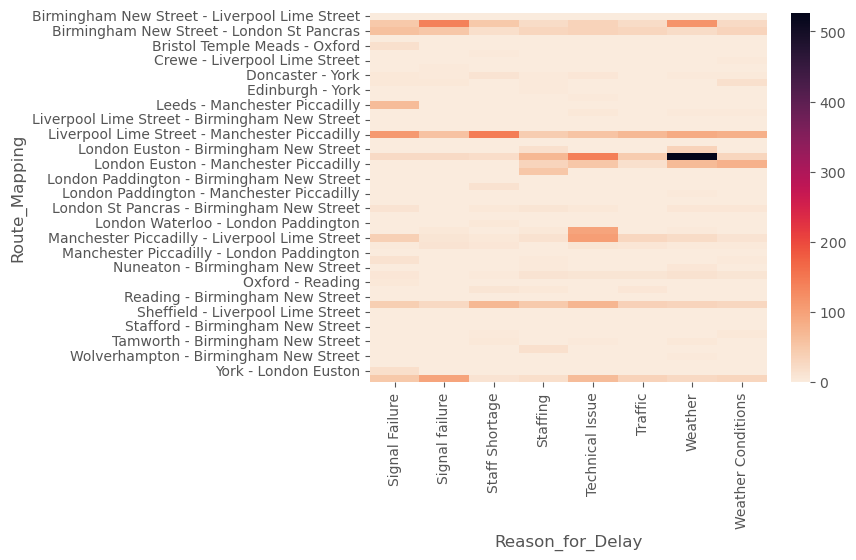

In [223]:
#lets explore more
#lets check which routes are having more issues with ontime performance
cmap = sns.cm.rocket_r 
outputs['routemap-delay_crosstab'] = pd.crosstab(index = df_delay['Route_Mapping'], columns = df_delay['Reason_for_Delay'])
sns.heatmap(outputs['routemap-delay_crosstab'], cmap=cmap)

In [226]:
import pickle
with open('outputs.pkl','rb') as f:
    outputs1 = pickle.load(f )

In [227]:
outputs1.keys()

dict_keys(['Top 5 Arrival Stations', 'Top 5 Departure Stations', 'Routes', 'Peak Travel Months', 'Peak Travel Weeks', 'Peak Travel Hours', 'peak travel times', 'revenue_by_class', 'revenue_by_type', 'revenue_by_class_and_type', 'revenue_by_class_and_type_crosstab', 'On-Time Performance', 'Reason_for_Delay', 'routemap-delay', 'routemap-delay_crosstab'])

## Findings:

**Findings1: Identify the most popular routes**

> `Birmingham New Street`  is top Arrival Station

> `Manchester Piccadilly` is the top  Departure station

> Top 10 most popular routes:
> 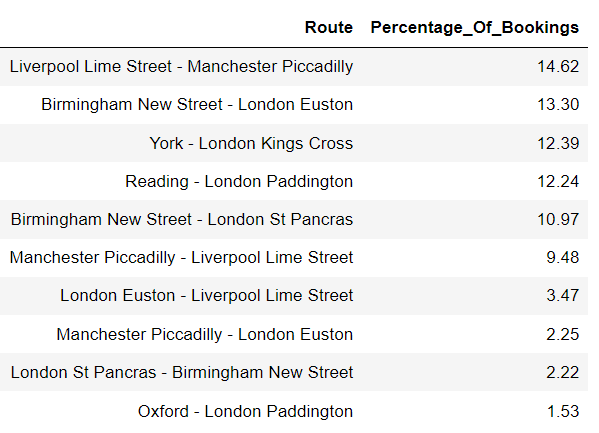



**Findings2: Determine peak travel times**

> The peak travelling times are as in the following order where Morning is in the first and Early morning is in the last position: (Day is divided into 4 parts)
> `Morning          34.70%`
> `Afternoon         29.42%`
> `Evening/Night     20.88%`
> `Early Morning     15.00%`

> `March & January` are the top travelling months

> `6 PM & 6 AM` are the busiest travelling hours



**Findings3: 3. Analyze revenue from different ticket types & classes**
> Revenue for Standard class is high compared to First Class, and as well as the number of passenger who bought the ticket & around 50% of the passengers in both Ticket Classes are Railcard holders. So it wont be a factor for low prices in First Class transactions

> The revenue for Advance & Off Peak booking is high compared to Anytime - This is interesting because Both have discounts/offer for the price but not for Anytime category. The reason for high revenue could be the no of passenger count in each Ticket Type. Also There are `66%` of the passangers are having Railcard from Anytime category so this could be one of the factors for low revenue from Anytime category 

>Combination: The Standard Class with Advance Type Bookings are high compared to other

**Findings 4. Diagnose on-time performance and contributing factors**

> Most of the trains are `On-Time with 86.82%` only `7.24% are delayed` and rest of the percentage are from cancelled trains

> **Contributing factors for the train delay**
in percentages: Weather is the primary factor for the delays
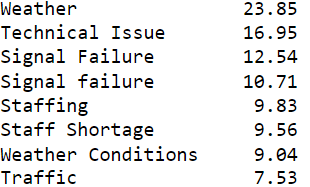

> **Top 10 Routes that are havings train delays**
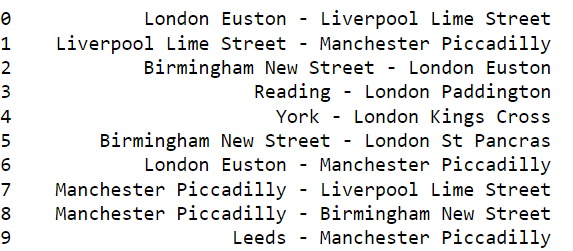

Reasons in detail:

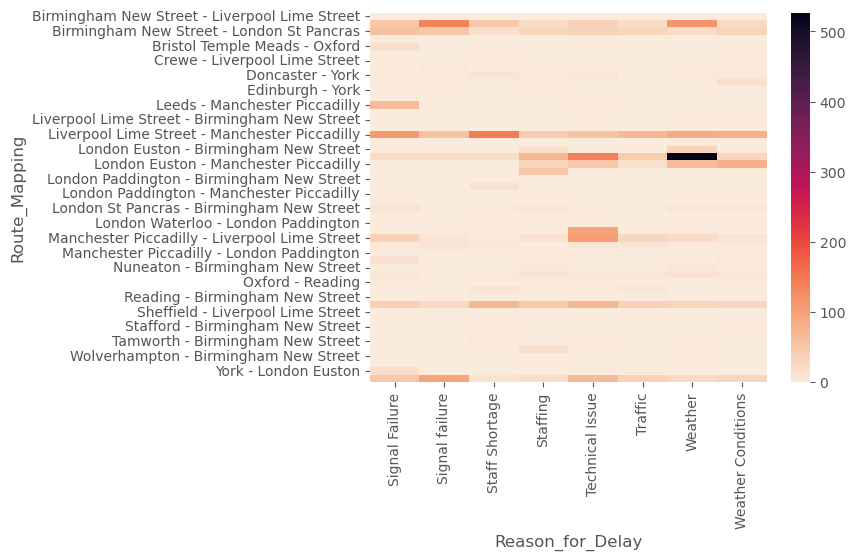

In [22]:
trains = df.groupby(['Departure_Time','Route_Mapping']).ngroup()
trains

0           33
1           31
2          151
3           58
4           47
         ...  
31648    19845
31649    19847
31650    19849
31651    19855
31652    19858
Length: 31653, dtype: int64

In [19]:
df.shape[0]-trains['Transaction_ID'].shape[0]

11782

19871

In [13]:
trains[trains['Transaction_ID']>1]

,Departure_Time,Route_Mapping,Transaction_ID
13,2024-01-01 06:15:00,York - London Kings Cross,2
15,2024-01-01 06:30:00,London St Pancras - Birmingham New Street,2
20,2024-01-01 07:30:00,York - London Kings Cross,2
21,2024-01-01 07:45:00,Reading - London Paddington,3
63,2024-01-02 01:45:00,Durham - York,2
...,...,...,...
19840,2024-04-30 18:45:00,Manchester Piccadilly - London Euston,2
19841,2024-04-30 18:45:00,Reading - London Paddington,2
19846,2024-04-30 20:00:00,Reading - London Paddington,2
19853,2024-04-30 21:00:00,Birmingham New Street - London Euston,2


In [20]:
df.head()

,Transaction_ID,Date_of_Purchase,Time_of_Purchase,Purchase_Type,Payment_Method,Railcard,Ticket_Class,Ticket_Type,Price,Departure_Station,Arrival_Destination,Date_of_Journey,Departure_Time,Arrival_Time,Actual_Arrival_Time,Journey_Status,Reason_for_Delay,Refund_Request,Route_Mapping,Travel_Time_Segment
0,da8a6ba8-b3dc-4677-b176,2023-12-08,2023-12-08 12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,2024-01-01 11:00:00,2024-01-01 13:30:00,2024-01-01 13:30:00,On Time,No Delay,No,Liverpool Lime Street - London Paddington,Morning
1,b0cdd1b0-f214-4197-be53,2023-12-16,2023-12-16 11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,2024-01-01 09:45:00,2024-01-01 11:35:00,2024-01-01 11:40:00,Delayed,Signal Failure,No,York - London Kings Cross,Morning
2,f3ba7a96-f713-40d9-9629,2023-12-19,2023-12-19 19:51:27,Online,Credit Card,None,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,2024-01-02 18:15:00,2024-01-02 18:45:00,2024-01-02 18:45:00,On Time,No Delay,No,Manchester Piccadilly - Liverpool Lime Street,Evening/Night
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,2023-12-20 23:00:36,Station,Credit Card,None,Standard,Advance,13,London Paddington,Reading,2024-01-01,2024-01-01 21:30:00,2024-01-01 22:30:00,2024-01-01 22:30:00,On Time,No Delay,No,Reading - London Paddington,Evening/Night
4,2be00b45-0762-485e-a7a3,2023-12-27,2023-12-27 18:22:56,Online,Contactless,None,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,2024-01-01 16:45:00,2024-01-01 19:00:00,2024-01-01 19:00:00,On Time,No Delay,No,London Euston - Liverpool Lime Street,Afternoon
